In [1]:
#https://medium.com/@ismaelbouarfa/malicious-url-detection-with-machine-learning-d57890443dec

In [2]:
# Wheregoes: to see where the URL is taking you without having to click on it.
# Url2Png: to see a screenshot of a website without having to visit it.
# VirusTotal: Our favorite to analyze suspicious URLs

In [3]:
#Url shortened to actual url, then analyse, do that

In [4]:
import csv
from sklearn.ensemble import AdaBoostRegressor
import pandas as pd
df = pd.read_csv(r'urldataset.csv')
print(df.head())

                      url label
0  diaryofagameaddict.com   bad
1        espdesign.com.au   bad
2      iamagameaddict.com   bad
3           kalantzis.net   bad
4   slightlyoffcenter.net   bad


In [5]:
import numpy as np
import pandas as pd
import re
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

In [6]:
df = pd.DataFrame(df)
df = df.sample(n=10000)
from io import StringIO
col = ['label','url']
df = df[col]

In [7]:
#Deleting nulls
df = df[pd.notnull(df['url'])]

In [8]:
#more settings for our data manipulation
df.columns = ['label', 'url']
df['category_id'] = df['label'].factorize()[0]
category_id_df = df[['label', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'label']].values)

In [9]:
df.head()

,label,url,category_id
226182,good,enotes.com/contemporary-musicians/april-wine-b...,0
131939,good,photosingers.blogspot.com/,0
327668,good,rlslog.net/company-of-heroes-opposing-fronts-f...,0
288919,good,marinabayyachtharbor.com/,0
69439,good,digitalcommons.unl.edu/afghanenglish/,0


In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
BAD_len = df[df['label'] == 'bad'].shape[0]
GOOD_len = df[df['label'] == 'good'].shape[0]

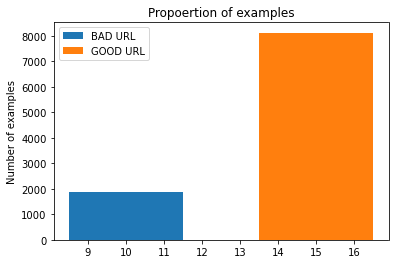

In [11]:
plt.bar(10,BAD_len,3, label='BAD URL')
plt.bar(15,GOOD_len,3, label='GOOD URL')
plt.legend()
plt.ylabel('Number of examples')
plt.title('Propoertion of examples')
plt.show()

<AxesSubplot:>

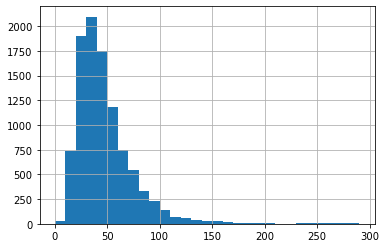

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
lens = df.url.str.len()
lens.hist(bins = np.arange(0,300,10))

In [13]:
#tokenizer function for URL
def getTokens(input):
    tokensBySlash = str(input.encode('utf-8')).split('/')
    allTokens=[]
    for i in tokensBySlash:
        tokens = str(i).split('-')
        tokensByDot = []
        for j in range(0,len(tokens)):
            tempTokens = str(tokens[j]).split('.')
            tokentsByDot = tokensByDot + tempTokens
        allTokens = allTokens + tokens + tokensByDot
    allTokens = list(set(allTokens))
    if 'com' in allTokens:
        allTokens.remove('com')
    return allTokens

In [14]:
y = [d[1]for d in df] #labels
myUrls = [d[0]for d in df] #urls
vectorizer = TfidfVectorizer( tokenizer=getTokens ,use_idf=True, smooth_idf=True, sublinear_tf=False)
features = vectorizer.fit_transform(df.url).toarray()
labels = df.label
features.shape

(10000, 24015)

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
model = LogisticRegression(random_state=0)
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.20, random_state=0)
model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)
y_pred = model.predict(X_test)

E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [16]:
clf = LogisticRegression(random_state=0) 
clf.fit(X_train,y_train)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print ('train accuracy =', train_score)
print ('test accuracy =', test_score)

E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


train accuracy = 0.864375
test accuracy = 0.8635


Text(0.5, 15.0, 'Predicted')

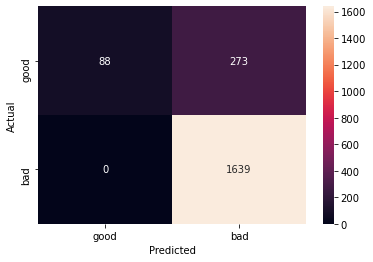

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d',xticklabels=category_id_df.label.values, yticklabels=category_id_df.label.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [18]:
X_predict = ['yahoo.fr','www.radsport-voggel.de/wp-admin/includes/log.exe','hello.ru']
X_predict = vectorizer.transform(X_predict)
y_Predict = clf.predict(X_predict)
print(y_Predict)

['good' 'bad' 'good']


In [19]:
X_predict = ['diaryofagameaddict.com','vtop.vit.ac.in','www.radsport-voggel.de/wp-admin/includes/log.exe','hello.ru']
X_predict = vectorizer.transform(X_predict)
y_Predict = clf.predict(X_predict)
print(y_Predict)

['good' 'good' 'bad' 'good']
